<div class='alert alert-block alert-success'>
   
# Feature Engineering Exercise 

</div>


<div class='alert alert-block alert-info'>

# By SelectKBest method

Select the K best features using a statistical test to compare each X with y and find which X's have the strongest relationship with y. 

For regression, we will use the correlation test (f_regression) to score the relationships.

* 1. Initialize the f_selector object, setting the parameters, or instructions for the method to follow: "use the f_regression test for scoring the features, and return to me the top 10 features", for example.


* 2. Fit the object to our data. That is, run a correlation test for every X variable with our y variable, and then rank the X variables based on how correlated they are with the y/target variable. Then give me the top 10 features.


* 3. Use get_feature_names_out() to get the list of features, and save them to a variable that you can use to filter your dataframe in modeling.           


## Example
    
from sklearn.feature_selection import SelectKBest, f_regression

###  parameters: f_regression stats test, give me 10 features (create an object)

f_selector = SelectKBest(f_regression, k=10)

###  find the top 10 X's correlated with y ( fit the object)

f_selector.fit(X_train_scaled, y_train)

###  save top 10 features

f_features = f_selector.get_feature_names_out()

f_features


output:===> array(['age', 'Medu', 'Fedu', 'traveltime', 'failures', 'G1', 'G2',
       'sex_M', 'guardian_other', 'higher_yes'], dtype=object)







</div>



<div class='alert alert-block alert-info'>

# By Recursive Feature Elimination(RFE) method

Recursive Feature Elimination will create a model with all the features, evaluate the performance metrics, find the weakest feature, remove it, then create a new model with the remaining features, evaluate the performance metrics, find the weakest feature, remove it, and so on, until it gets down to the number of features you have indicated you want when creating the RFE object. You will also need to indicate which Machine Learning algorithm you want to use.

* 1. Initialize the machine learning algorithm, in this case, LinearRegression

* 2. Initialize the RFE object, and provide the ML algorithm object from Step 1

* 3. Fit the RFE object to our data. Doing this will provide us with a list of features (the number we asked for) as well as a ranking of all the features.

* 4. Assign the list of selected features to a variable.

* 5. Optional: Get a ranking of all variables (1 being the most important)
    

## Example

from sklearn.linear_model import LinearRegression

from sklearn.feature_selection import RFE

### initialize the ML algorithm

lm = LinearRegression()

### create the rfe object, indicating the ML object (lm) and the number of features I want to end up with. 

rfe = RFE(lm, n_features_to_select=2)

### fit the data using RFE

rfe.fit(X_train_scaled,y_train)  

### get list of the column names. 

rfe_feature = rfe.get_feature_names_out()

rfe_feature
    
Output:===> array(['G1', 'G2'], dtype=object)










</div>

In [1]:
#standard imports
import pandas as pd
import numpy as np

#viualization imports
import matplotlib.pyplot as plt
import seaborn as sns

#stats 
from scipy import stats

# from sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, QuantileTransformer
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import SelectKBest, RFE, f_regression, SequentialFeatureSelector


#custom modules
import wrangle as w

#remove pink warning box
import warnings
warnings.filterwarnings('ignore')

<div class='alert alert-block alert-success'>

# Q1) Load the tips dataset.

a) Create a column named price_per_person. This should be the total bill divided by the party size.

b) Before using any of the methods discussed in the lesson, which features do you think would be most important for predicting the tip amount?

c) Use Select K Best to select the top 2 features for predicting tip amount. What are they?

d) Use Recursive Feature Elimination to select the top 2 features for tip amount. What are they?

e) Why do you think Select K Best and Recursive Feature Elimination might give different answers for the top features? Does this change as you change the number of features you are selecting?    


</div>

<div class='alert alert-block alert-info'>

## Note:
    


* We should be at the point where we are creating functions that can be used over and over again.


* Something that we will consistently do is split our data into train, validate and test sets.


* We will also (often times) be isolating our target variables into y_train, y_validate and y_tests.


### Let's make these functions reusable!    
    
</div>

In [2]:
from pydataset import data

In [3]:
tips=data('tips')
tips.head(3)

,total_bill,tip,sex,smoker,day,time,size
1,16.99,1.01,Female,No,Sun,Dinner,2
2,10.34,1.66,Male,No,Sun,Dinner,3
3,21.01,3.50,Male,No,Sun,Dinner,3


In [4]:
tips.shape

(244, 7)

In [5]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
Index: 244 entries, 1 to 244
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 15.2+ KB


> ## a) Create a column named price_per_person. This should be the total bill divided by the party size.

In [6]:
# Create the 'price_per_person' column
tips['price_per_person'] = tips['total_bill'] / tips['size']

In [7]:
tips.head(3)

,total_bill,tip,sex,smoker,day,time,size,price_per_person
1,16.99,1.01,Female,No,Sun,Dinner,2,8.495000
2,10.34,1.66,Male,No,Sun,Dinner,3,3.446667
3,21.01,3.50,Male,No,Sun,Dinner,3,7.003333


> ## b) Before using any of the methods discussed in the lesson, which features do you think would be most important for predicting the tip amount?

<div class='alert alert-block alert-info'>

## Note: 

* We may choose to create a function that groups our data by datatype for us. 
    
* This way we don't have to recreate this action each time.

</div>

In [8]:
# Create a function that groups our data by datatype
def discrete_cols(df):
    cat_cols= df.select_dtypes(include=['object']).columns.tolist()
    return cat_cols

def continuous_cols(df):
    con_cols= df.select_dtypes(exclude=['object']).columns.tolist()
    return con_cols

In [9]:
# use the function on the tips dataframe to separate our continuous variables
con_cols = continuous_cols(tips)
con_cols

['total_bill', 'tip', 'size', 'price_per_person']

In [10]:
# use the function on the tips dataframe to separate our discrete or categorical variables
cat_cols = discrete_cols(tips)
cat_cols

['sex', 'smoker', 'day', 'time']

<font color='purple'>
      
## To find the most important features for predicting the tip amount.
</font>

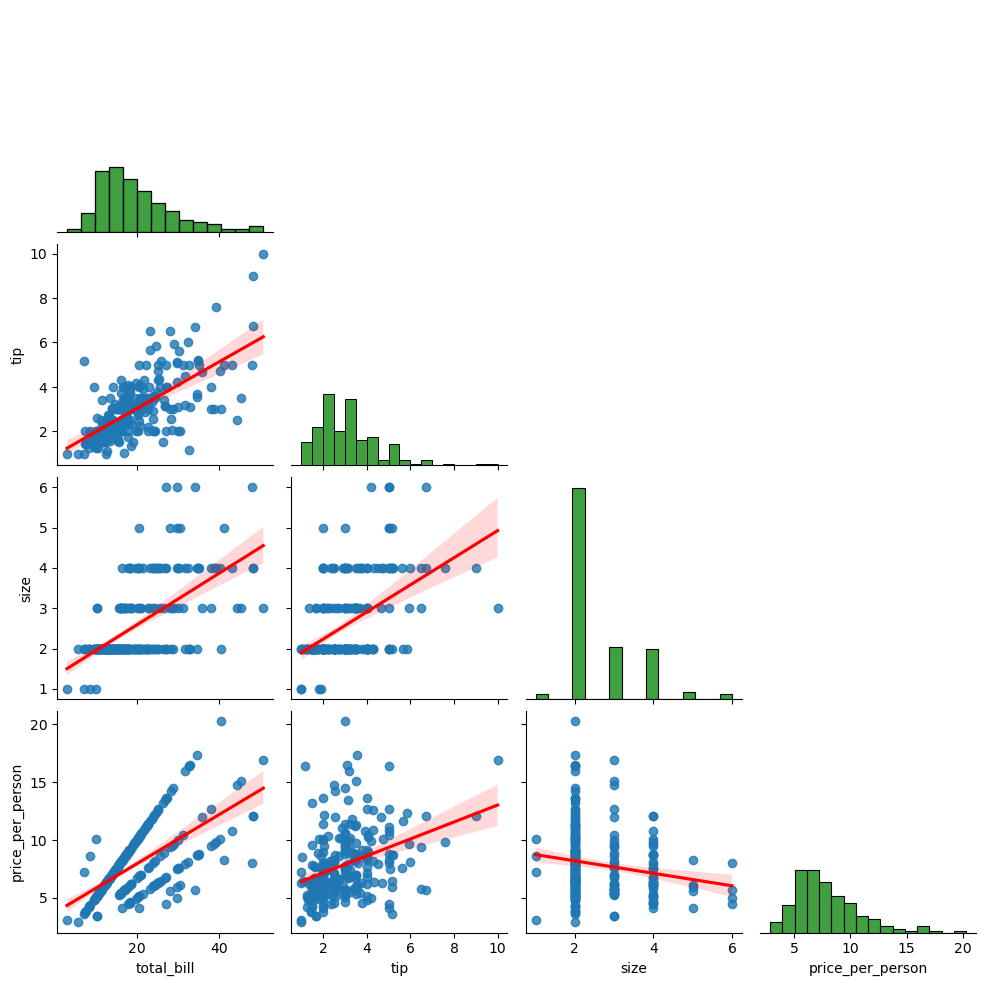

In [11]:
# pairplot to visualize correlation
# kws=keyword arguments
sns.pairplot(tips,kind='reg',
                  plot_kws={'line_kws':{'color': 'red'}},
                  diag_kws={'color':'green'},
                  corner=True
                )
plt.show()
    

<div class='alert alert-block alert-info'>

## Takeaways: 

* We can see that "tip" and "total_bill" seem to have some correlation

* It appears "total_bill" would be most important in predicting "tip" and "tip_percentage"
</div>

In [12]:
# take a look at correlation
tips[con_cols].corr()

,total_bill,tip,size,price_per_person
total_bill,1.000000,0.675734,0.598315,0.647497
tip,0.675734,1.000000,0.489299,0.347393
size,0.598315,0.489299,1.000000,-0.175412
price_per_person,0.647497,0.347393,-0.175412,1.000000


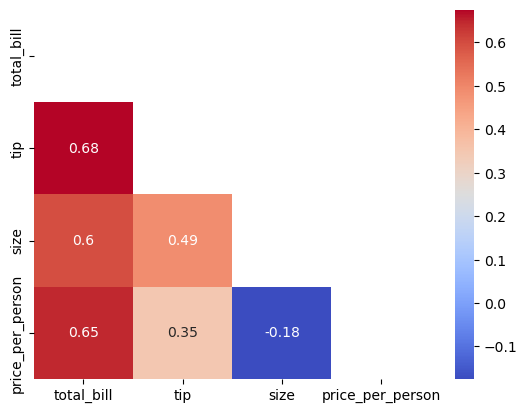

In [13]:
# plot heatmap
sns.heatmap(tips[con_cols].corr(), cmap='coolwarm', annot=True,
           mask=np.triu(tips[con_cols].corr()))
plt.show()


<div class='alert alert-block alert-info'>
    
## Takeaways: 

* here we can see that "tip" has the highest correlation with "total_bill"(0.68)
    
* then 'size'(0.49) & 'price_per_person'(0.35)
    
</div>

<div class='alert alert-block alert-success'>

## Note:

* Before using SelectKBest to select the top 2 features for predicting tip amount you must have encocded object types and scaled numerical types (excluding the target).


* We need to create dummy variables for two reasons: 
    1. In order to use RFE, we cannot have 'object' datatypes

    2. We will also need dummy variables in order to scale. The scaler does not know what objects are. It doesn't understand what "Female" or "Saturday" mean.
    
</div>

In [14]:
# I think the most important features are total_bill, size, and price_per_person (X1,X2,X3) (let's say)
# to predict the tip amount(Y) 

train,val,test=w.split_data(tips)



       train  ----> (146, 8)
    validate  ----> (49, 8)
        test  ----> (49, 8)


<div class='alert alert-block alert-info'>

## NOTE( 1st way): 
Here is a demonstration of begin W/O separating X variables from the y variable and using a scaler (only scaling numerical columns)     
</div>

In [15]:
# before we go through feature engineering, we need to do scaling of the selected feature(s)

# 1. create the object
# scaler =MinMaxScaler()

# 2. fit the object (learn the min and max value)
# scaler.fit(train[['total_bill','size','price_per_person']])

In [16]:
# train_scaled = scaler.transform(train[['total_bill','size','price_per_person']])
# val_scaled = scaler.transform(val[['total_bill','size','price_per_person']])
# test_scaled = scaler.transform(test[['total_bill','size','price_per_person']])

In [17]:
# train.head(3)

In [18]:
# train_scaled[:4]

In [19]:
# assign the scaled values as new columns in the train

# train[['total_bill_scaled','size_scaled','price_per_person_scaled']] = train_scaled
# val[['total_bill_scaled','size_scaled','price_per_person_scaled']] = val_scaled
# test[['total_bill_scaled','size_scaled','price_per_person_scaled']] = test_scaled

In [20]:
# train.head(3)

In [21]:
# X_train,y_train = train[['total_bill_scaled','size_scaled','price_per_person_scaled']], train['tip']
# X_val, y_val = val[['total_bill_scaled','size_scaled','price_per_person_scaled']], val['tip']
# X_test, y_test = test[['total_bill_scaled','size_scaled','price_per_person_scaled']], test['tip']

<div class='alert alert-block alert-info'>

## NOTE( 2nd way): 
Here is a demonstration of begin /W separating X variables from the y variable and using a scaler (only scaling numerical columns)     
</div>

In [22]:
# X and y splits to scale
target = "tip"

X_train = train[['total_bill', 'size', 'price_per_person']]
y_train = train[target]

X_val = val[['total_bill', 'size', 'price_per_person']]
y_val = val[target]

X_test = test[['total_bill', 'size', 'price_per_person']]
y_test = test[target]

In [23]:
X_train.head(3)

,total_bill,size,price_per_person
37,16.31,3,5.436667
218,11.59,2,5.795000
64,18.29,4,4.572500


In [24]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 146 entries, 37 to 110
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   total_bill        146 non-null    float64
 1   size              146 non-null    int64  
 2   price_per_person  146 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 4.6 KB


In [25]:
y_train.info()

<class 'pandas.core.series.Series'>
Index: 146 entries, 37 to 110
Series name: tip
Non-Null Count  Dtype  
--------------  -----  
146 non-null    float64
dtypes: float64(1)
memory usage: 2.3 KB


In [26]:
# before we go through feature engineering, we need to do scaling of the selected feature(s)

# 1. create the object
scaler =MinMaxScaler()

# 2. fit the object (learn the min and max value)
scaler.fit(X_train)

MinMaxScaler()

In [27]:
#use it
#make a new column within train
#use 'transform' instead of 'predict'
X_train_scaled = scaler.transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

In [28]:
X_train_scaled[:3]

array([[0.29292035, 0.4       , 0.17740074],
       [0.18849558, 0.2       , 0.20221607],
       [0.33672566, 0.6       , 0.1175554 ]])

In [29]:
X_train_scaled=pd.DataFrame(X_train_scaled,index=X_train.index,columns=X_train.columns)
X_train_scaled.head(3)

,total_bill,size,price_per_person
37,0.292920,0.4,0.177401
218,0.188496,0.2,0.202216
64,0.336726,0.6,0.117555


<font color='green'>

## Note:--- With Dummies 

* This is just a short section to demonstrate how you would encode cat columns, scale num columns, and separate X variables from y viariables for a train data set.

* This demonstration assumes you want to use "size" as categorical, but it's up to you what you want to do with it. If you want it to be continuous then add it to the list of columns to scale.
</font>

In [30]:
cat_cols

['sex', 'smoker', 'day', 'time']

In [31]:
cat_cols.append('size')


In [32]:
cat_cols

['sex', 'smoker', 'day', 'time', 'size']

In [33]:
#Create dummy columns of my categorical features
train_dummy = pd.get_dummies(columns=cat_cols, data=train,drop_first=True).astype(int)
train_dummy.head(3)

,total_bill,tip,price_per_person,sex_Male,smoker_Yes,day_Sat,day_Sun,day_Thur,time_Lunch,size_2,size_3,size_4,size_5,size_6
37,16,2,5,1,0,1,0,0,0,0,1,0,0,0
218,11,1,5,1,1,1,0,0,0,1,0,0,0,0
64,18,3,4,1,1,1,0,0,0,0,0,1,0,0


In [34]:
#Instantiate the min-max scaler and fit/transform my continuous features
scaler_dummy = MinMaxScaler()

#fit
scaler_dummy.fit(train_dummy[['total_bill', 'price_per_person']])

#transform
train_dummy[['total_bill', 'price_per_person']] = scaler_dummy.transform \
                                                (train_dummy[['total_bill', 'price_per_person']])

In [35]:
train_dummy.head(3)

,total_bill,tip,price_per_person,sex_Male,smoker_Yes,day_Sat,day_Sun,day_Thur,time_Lunch,size_2,size_3,size_4,size_5,size_6
37,0.288889,2,0.200000,1,0,1,0,0,0,0,1,0,0,0
218,0.177778,1,0.200000,1,1,1,0,0,0,1,0,0,0,0
64,0.333333,3,0.133333,1,1,1,0,0,0,0,0,1,0,0


In [36]:
#Create X and y dataframes
X_train_dummy = train_dummy.drop(columns=['tip'])
y_train_dummy = train_dummy['tip']

In [37]:
X_train_dummy.head(3)

,total_bill,price_per_person,sex_Male,smoker_Yes,day_Sat,day_Sun,day_Thur,time_Lunch,size_2,size_3,size_4,size_5,size_6
37,0.288889,0.200000,1,0,1,0,0,0,0,1,0,0,0
218,0.177778,0.200000,1,1,1,0,0,0,1,0,0,0,0
64,0.333333,0.133333,1,1,1,0,0,0,0,0,1,0,0


In [38]:
y_train.head(2)

37     2.0
218    1.5
Name: tip, dtype: float64

 > ## c) Use Select K Best to select the top 2 features for predicting tip amount. What are they?

<div class='alert alert-block alert-success'>

# SelectKBest
</div>

<div class='alert alert-block alert-info'>

## Note: 

* SelectKBest requires you to call the number of "k" or features that you want

* For this instance, our parameters are: 
    
    1. f_regression stats test, give me 2 features 
    
    2. f_regression stats test, scores relationships between target and the other variables
    
</div>

<font color='purple'>

## SelectKBest for 1st way of Q1b)
    
</font>

In [39]:
# MAKE an object
# kbest = SelectKBest(f_regression, k=2)

# FIT the thing
# kbest.fit(X_train, y_train)

In [40]:
# kbest.feature_names_in_

In [41]:
# statistical f-value / feature's scores:
# kbest.scores_

In [42]:
# p value: 
# kbest.pvalues_

In [43]:
# kbest_results = pd.DataFrame(dict(p=kbest.pvalues_, f=kbest.scores_),index = X_train.columns)
# kbest_results

In [44]:
# save top 2 features
# best_features = kbest.get_feature_names_out()
# best_features

In [45]:
# another way
# we can apply this mask to the columns in our original dataframe
# X_train.columns[kbest.get_support()]

In [46]:
# X_train.columns[kbest.support()].tolist()

<font color='purple'>

## SelectKBest for 2nd way of Q1b)
    
</font>

In [47]:
# MAKE an object
kbest = SelectKBest(f_regression, k=2)

# FIT the thing
kbest.fit(X_train_scaled, y_train)

SelectKBest(k=2, score_func=<function f_regression at 0x1744f6980>)

In [48]:
#create the mask
feature_mask = kbest.get_support()

In [49]:
#now we are going to ask for the column names of select k best top 2 features
X_train.columns[feature_mask]

Index(['total_bill', 'size'], dtype='object')

In [50]:
# We can also complete the masking and creating feature column list in one step once we get comfortable

X_train.columns[kbest.get_support()]

Index(['total_bill', 'size'], dtype='object')

### Conclusion:===>

* total_bill_scaled is the best feature with the highest feature score

* size_scaled is the second best feature

> ## d) Use Recursive Feature Elimination to select the top 2 features for tip amount. What are they?

<div class='alert alert-block alert-success'>

# RFE (Recursive Feature Elimination) 
</div>

## RFE apply on "X_train"

In [51]:
# initialize the ML algorithm
# lm = LinearRegression()

In [52]:
# create the rfe object, indicating the ML object (lm) and the number of features 2, 
# which i want to end up with. 
# rfe = RFE(lm, n_features_to_select=2)


In [53]:
# fit the data using RFE
# rfe.fit(X_train,y_train)

In [54]:
# rfe.ranking_

In [55]:
# another way
# we can apply this mask to the columns in our original dataframe
# X_train.columns[rfe.get_support_]

In [56]:
# X_train.columns[rfe.support_].tolist()

In [57]:
# pd.DataFrame({'feature': X_train.columns.to_list(),'rfe_ranking': rfe.ranking_})

## Conclusion:====>
 
* 'total_bill_scaled' & 'size_scaled' are the best features with the highest feature rank of 1.

## RFE apply on the "X_train_scaled" 

In [58]:
# Initialize the machine learning algorithm, in this case, LinearRegression
#create algorithm
lm = LinearRegression()

In [59]:
#assign the number of feature
#create the RFE object
rfe = RFE(estimator=lm, n_features_to_select=2)

In [60]:
# fit the data using RFE object
rfe.fit(X_train_scaled,y_train)

RFE(estimator=LinearRegression(), n_features_to_select=2)

In [61]:
#create a variable that takes X_train and turns rfe features into a list
rfe_columns = X_train.columns[rfe.support_].tolist()
#call the variable
rfe_columns

['total_bill', 'size']

> ## e) Why do you think Select K Best and Recursive Feature Elimination might give different answers for the top features? Does this change as you change the number of features you are selecting?

### A:  Both "SelectKBest" & "RFE" give the same answer. ['total_bill', 'size']

<div class='alert alert-block alert-success'>

# Q2) Write a function named select_kbest that takes in the predictors (X), the target (y), and the number of features to select (k) and returns the names of the top k selected features based on the SelectKBest class. Test your function with the tips dataset. You should see the same results as when you did the process manually.    
    
</div>

In [62]:
# X = predictors or independent variables
# y = target or dependent variable
# k = number of features or top selected features
def select_kbest(X, y, k):
    '''
    X: a DataFrame; Scaled features
    y: a Pandas series; target
    k: int; number of features to return
    
    Returns a list of the column names that are the k best features
    '''
    f_selector = SelectKBest(f_regression, k=k)
    f_selector.fit(X, y)

    mask = f_selector.get_support()
    f_feature = X.columns[mask].tolist()
    return f_feature

In [63]:
select_kbest(X_train,y_train,2) # X_train is w/o scaling 

['total_bill', 'size']

In [64]:
select_kbest(X_train_scaled,y_train,2) # X_train_scaled w/ scaling 

['total_bill', 'size']

<div class='alert alert-block alert-success'>

# Q3) Write a function named rfe that takes in the predictors, the target, and the number of features to select. It should return the top n features based on the RFE class. Test your function with the tips dataset. You should see the same results as when you did the process manually.    
</div>

In [65]:
# X = predictors or independent variables
# y = target or dependent variable
# k = number of features or top selected features
def rfe(X, y, k):
    '''
    X: a Pandas DataFrame; Scaled features
    y: a Pandas Series; target
    k: int; number of features to return
    
    Returns a list of the column names that are the k best features
    '''
    # initialize the ML algorithm
    lm = LinearRegression()
    
    # create the rfe object, indicating the ML object (lm) and the number of features 2, 
    # which i want to end up with. 
    rfe = RFE(lm, n_features_to_select=k)
    
    # fit the object
    rfe.fit(X, y)

    f_feature=X.columns[rfe.support_].tolist()
    return f_feature

In [66]:
rfe(X_train,y_train,2) # X_train w/o scaling

['size', 'price_per_person']

In [67]:
rfe(X_train_scaled,y_train,2) # X_train_scaled /w  scaling

['total_bill', 'size']

<div class='alert alert-block alert-success'>

# Q4) Load the swiss dataset and use all the other features to predict Fertility. Find the top 3 features using both Select K Best and Recursive Feature Elimination (use the functions you just built to help you out).   
</div>

In [68]:
swiss=data('swiss')
swiss.head(3)

,Fertility,Agriculture,Examination,Education,Catholic,Infant.Mortality
Courtelary,80.2,17.0,15,12,9.96,22.2
Delemont,83.1,45.1,6,9,84.84,22.2
Franches-Mnt,92.5,39.7,5,5,93.40,20.2


In [69]:
swiss.shape

(47, 6)

In [70]:
swiss.info()

<class 'pandas.core.frame.DataFrame'>
Index: 47 entries, Courtelary to Rive Gauche
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Fertility         47 non-null     float64
 1   Agriculture       47 non-null     float64
 2   Examination       47 non-null     int64  
 3   Education         47 non-null     int64  
 4   Catholic          47 non-null     float64
 5   Infant.Mortality  47 non-null     float64
dtypes: float64(4), int64(2)
memory usage: 2.6+ KB


## W/O splitting swiss dataframe

In [71]:
#assign everything to X except Fertility because we are using it as our y
X= swiss.drop(columns=['Fertility'])
#assign y_train 
y = swiss['Fertility']

In [72]:
#Use the "select_Kbest" function we created to find our top 3 features
select_kbest(X, y,3)

['Examination', 'Education', 'Catholic']

In [73]:
#Use the "rfe" function we created to find our top 3 features
rfe(X, y, 3)

['Examination', 'Education', 'Infant.Mortality']

## /W splitting swiss dataframe

In [74]:
train_sw,val_sw,test_sw=w.split_data(swiss)


       train  ----> (28, 6)
    validate  ----> (9, 6)
        test  ----> (10, 6)


In [75]:
# 2. fit the object (learn the min and max value)
scaler.fit(train_sw[['Agriculture','Examination','Education','Catholic','Infant.Mortality']])

MinMaxScaler()

In [76]:
train_sw_scaled = scaler.transform(train_sw[['Agriculture','Examination',
                                             'Education','Catholic','Infant.Mortality']])

val_sw_scaled = scaler.transform(val_sw[['Agriculture','Examination',
                                         'Education','Catholic','Infant.Mortality']])

test_sw_scaled = scaler.transform(test_sw[['Agriculture','Examination',
                                           'Education','Catholic','Infant.Mortality']])

In [77]:
# assign the scaled values as new columns in the train

train_sw[['Agriculture_scaled','Examination_scaled','Education_scaled',
                           'Catholic_scaled','Infant.Mortality_scaled']] = train_sw_scaled

val_sw[['Agriculture_scaled','Examination_scaled','Education_scaled',
                           'Catholic_scaled','Infant.Mortality_scaled']] = val_sw_scaled

test_sw[['Agriculture_scaled','Examination_scaled','Education_scaled',
                           'Catholic_scaled','Infant.Mortality_scaled']] = test_sw_scaled

In [78]:
train_sw.head()

,Fertility,Agriculture,Examination,Education,Catholic,Infant.Mortality,Agriculture_scaled,Examination_scaled,Education_scaled,Catholic_scaled,Infant.Mortality_scaled
La Chauxdfnd,65.7,7.7,29,11,13.79,20.5,0.000000,0.81250,0.300000,0.112883,0.551020
Glane,92.4,67.8,14,8,97.16,24.9,0.732927,0.34375,0.200000,0.970776,1.000000
Morges,65.5,59.8,22,10,5.23,18.0,0.635366,0.59375,0.266667,0.024799,0.295918
Rive Gauche,42.8,27.7,22,29,58.33,19.3,0.243902,0.59375,0.900000,0.571208,0.428571
Moutier,85.8,36.5,12,7,33.77,20.3,0.351220,0.28125,0.166667,0.318481,0.530612


In [79]:
X_train_sw,y_train_sw = train_sw[['Agriculture_scaled','Examination_scaled','Education_scaled',
                           'Catholic_scaled','Infant.Mortality_scaled']], train_sw['Fertility']

X_val_sw,y_val_sw = val_sw[['Agriculture_scaled','Examination_scaled','Education_scaled',
                           'Catholic_scaled','Infant.Mortality_scaled']], val_sw['Fertility']

X_test_sw,y_test_sw = test_sw[['Agriculture_scaled','Examination_scaled','Education_scaled',
                           'Catholic_scaled','Infant.Mortality_scaled']], test_sw['Fertility']

In [80]:
select_kbest(X_train_sw, y_train_sw, 3)

['Examination_scaled', 'Education_scaled', 'Catholic_scaled']

In [81]:
rfe(X_train_sw,y_train_sw,3)

['Examination_scaled', 'Education_scaled', 'Infant.Mortality_scaled']

<div class='alert alert-block alert-success'>

# Functionize a couple of tasks:    
    
</div>

In [82]:
#create a function to isolate the target variable AND split a DF
def X_y_split(df, target):
    '''
    This function takes in a dataframe and a target variable
    Then it returns the X_train, y_train, X_validate, y_validate, X_test, y_test
    and a print statement with the shape of the new dataframes
    '''  
    train, validate, test = w.split_data(df)

    X_train = train.drop(columns= target)
    y_train = train[target]

    X_validate = validate.drop(columns= target)
    y_validate = validate[target]

    X_test = test.drop(columns= target)
    y_test = test[target]
        
    # Have function print datasets shape
    print(f'X_train -> {X_train.shape}')
    print(f'X_validate -> {X_validate.shape}')
    print(f'X_test -> {X_test.shape}')  
    
    return X_train, y_train, X_validate, y_validate, X_test, y_test

In [83]:
X_train, y_train, X_validate, y_validate, X_test, y_test=X_y_split(tips,'tip')


       train  ----> (146, 8)
    validate  ----> (49, 8)
        test  ----> (49, 8)
X_train -> (146, 7)
X_validate -> (49, 7)
X_test -> (49, 7)


In [ ]:
# Create a function to isolate the target variable from an ALREADY split dataframe
def X_y_split(train, validate, test, target):
    '''
    This function takes in train, validate, and test dataframes and the target variable.
    Then it returns the X_train, y_train, X_validate, y_validate, X_test, y_test.
    '''  

    X_train = train.drop(columns= target)
    y_train = train[target]

    X_validate = validate.drop(columns= target)
    y_validate = validate[target]

    X_test = test.drop(columns= target)
    y_test = test[target]
    
    # Have function print datasets shape
    print(f'X_train -> {X_train.shape}')
    print(f'y_train -> {y_train.shape}')
    print()
    print()
    print(f'X_validate -> {X_validate.shape}')
    print(f'y_validate -> {y_validate.shape}')
    print()
    print()
    print(f'X_test -> {X_test.shape}')
    print(f'y_test -> {y_test.shape}') 
    
    return X_train, y_train, X_validate, y_validate, X_test, y_test

In [ ]:
X_train, y_train, X_validate, y_validate, X_test, y_test=X_y_split(tips,'tip')